In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('final_df2.csv')
df

,trait name,assesment,gender,ancestry,bmi,diabetes,hypertention
0,Achilles Tendinopathy,NORMAL,1,1,3,1,1
1,Aerobic performance,TYPICAL,1,1,3,1,1
2,Anterior Cruciate Ligament Rupture,NORMAL,1,1,3,1,1
3,Caffeine Metabolism Impairment,NORMAL,1,1,3,1,1
4,Calcium Deficiency,NORMAL,1,1,3,1,1
...,...,...,...,...,...,...,...
8531,Vitamin D Deficiency,NORMAL,1,1,2,0,1
8532,Vitamin E Deficiency,NORMAL,1,1,2,0,1
8533,Vitamin K Deficiency,NORMAL,1,1,2,0,1
8534,Youthfulness,TYPICAL,1,1,2,0,1


In [38]:
#unique assesments present in the chosen group
traitNames = df['trait name'].unique().tolist()
traitNames

['Achilles Tendinopathy',
 'Aerobic performance',
 'Anterior Cruciate Ligament Rupture',
 'Caffeine Metabolism Impairment',
 'Calcium Deficiency',
 'Carb Overconsumption',
 'Choline Deficiency',
 'Coenzyme Q10 Deficiency',
 'Collagen Breakdown',
 'Copper Deficiency',
 'Difficulty in Losing Weight',
 'Dryness',
 'Elite Endurance Athletes',
 'Endurance',
 'Exercise Aversion',
 'Exercise Benefits for Blood Pressure',
 'Exercise Benefits for Lowering Cholesterol',
 'Exercise Benefits for Maximal Oxygen Uptake Response',
 'Facial Pigmented Spots',
 'Fat Overconsumption',
 'Fat Taste Perception',
 'General Food Sensitivities',
 'Gluten Sensitivity',
 'Heartbeat Reduction Difficulty',
 'Iron Deficiency',
 'Iron Overload',
 'Joint Flexibility',
 'Joint Injury Risk',
 'Lactose Intolerance',
 'Lean Body Mass Potential',
 'Low Protein Intake Risk',
 'Low Resting Metabolic Rate',
 'Low-carb Diet Effectiveness',
 'Low-fat Diet Effectiveness',
 'Lower Exercise Benefits for Heart Pump Function',
 'Lu

In [58]:
newdf= df.groupby('trait name')
newdf.first()

,assesment,gender,ancestry,bmi,diabetes,hypertention
trait name,,,,,,
Achilles Tendinopathy,NORMAL,1,1,3,1,1
Aerobic performance,TYPICAL,1,1,3,1,1
Anterior Cruciate Ligament Rupture,NORMAL,1,1,3,1,1
Caffeine Metabolism Impairment,NORMAL,1,1,3,1,1
Calcium Deficiency,NORMAL,1,1,3,1,1
...,...,...,...,...,...,...
Vitamin D Deficiency,NORMAL,1,1,3,1,1
Vitamin E Deficiency,NORMAL,1,1,3,1,1
Vitamin K Deficiency,NORMAL,1,1,3,1,1


In [59]:
traitName = 'Anterior Cruciate Ligament Rupture'
# we will add lack or prese
title_part1 = 'Percentages of Gender & Ancestry Segmentations for ' 
title_part2 = ' of hypertention & diabetes for ' + traitName 
graph_title_lack = title_part1 + 'lack' + title_part2
graph_title_presence = title_part1 + 'presence' + title_part2

In [66]:
data=newdf.get_group(traitName)
data

,trait name,assesment,gender,ancestry,bmi,diabetes,hypertention
0,Achilles Tendinopathy,NORMAL,1,1,3,1,1
88,Achilles Tendinopathy,NORMAL,1,0,3,1,1
176,Achilles Tendinopathy,NORMAL,1,1,2,0,1
264,Achilles Tendinopathy,NORMAL,0,0,3,1,1
352,Achilles Tendinopathy,NORMAL,1,1,1,0,1
...,...,...,...,...,...,...,...
8096,Achilles Tendinopathy,NORMAL,0,1,3,0,1
8184,Achilles Tendinopathy,NORMAL,1,1,1,0,1
8272,Achilles Tendinopathy,NORMAL,1,1,3,0,1
8360,Achilles Tendinopathy,NORMAL,0,1,2,0,0


In [55]:
#unique assesments present in the chosen group
data['assesment'].unique()

array(['NORMAL'], dtype=object)

In [67]:
#drop train name from set for easier analysis
data = data.iloc[: , 1:]
data

,assesment,gender,ancestry,bmi,diabetes,hypertention
0,NORMAL,1,1,3,1,1
88,NORMAL,1,0,3,1,1
176,NORMAL,1,1,2,0,1
264,NORMAL,0,0,3,1,1
352,NORMAL,1,1,1,0,1
...,...,...,...,...,...,...
8096,NORMAL,0,1,3,0,1
8184,NORMAL,1,1,1,0,1
8272,NORMAL,1,1,3,0,1
8360,NORMAL,0,1,2,0,0


### Graph for lack of diabetes and hypertention

In [78]:
graph_data_percentage=data.groupby(['gender','ancestry', 'bmi'])['hypertention', 'diabetes'].apply(lambda x: (x==0).sum().apply(lambda x: ((x/97)*100)))
graph_data_percentage

<ipython-input-78-18ce0ec7d307>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  graph_data_percentage=data.groupby(['gender','ancestry', 'bmi'])['hypertention', 'diabetes'].apply(lambda x: (x==0).sum().apply(lambda x: ((x/97)*100)))


hypertention   diabetes
gender ancestry bmi                         
0      0        1        1.030928   1.030928
                2        1.030928   3.092784
                3        0.000000   1.030928
       1        1        3.092784   7.216495
                2        6.185567  17.525773
                3        2.061856   6.185567
1      0        1        0.000000   1.030928
                2        0.000000   0.000000
                3        0.000000   3.092784
       1        0        0.000000   1.030928
                1        0.000000   8.247423
                2        0.000000   7.216495
                3        0.000000   7.216495

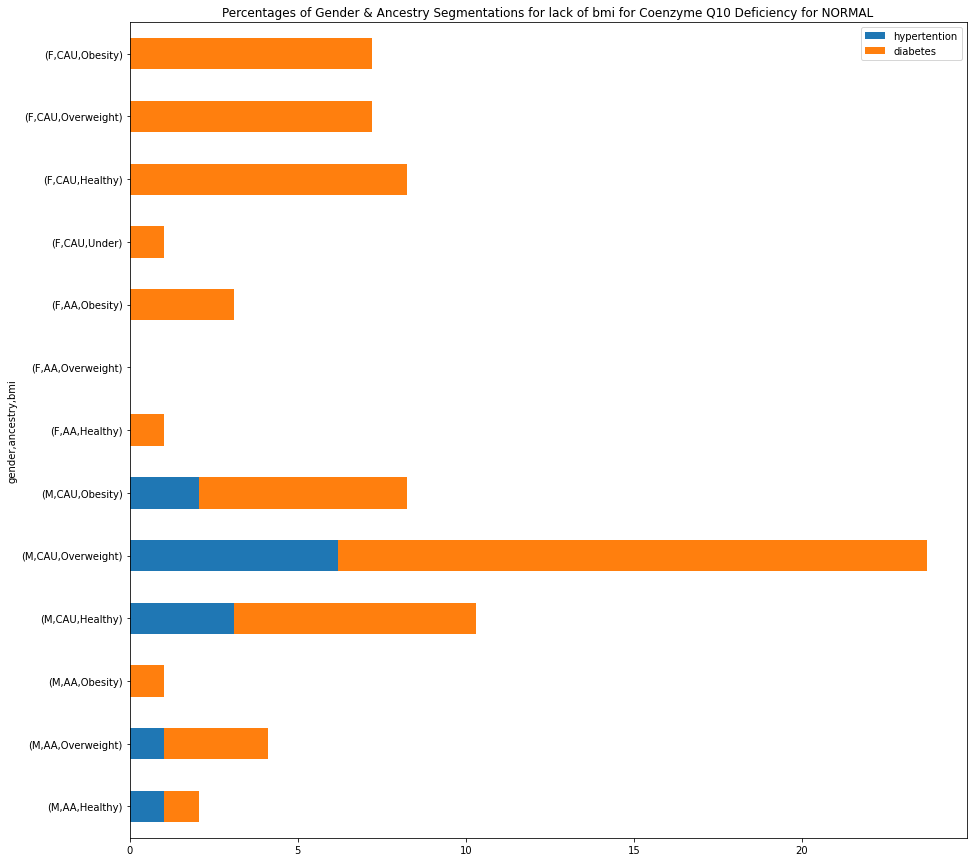

In [84]:
graph_data_percentage.plot(kind='barh',stacked=True,rot=1, title=graph_title_lack, figsize=(15,15))
plt.yticks(ticks = [0,1,2,3,4,5,6,7,8,9,10,11,12],labels = ['(M,AA,Healthy)', '(M,AA,Overweight)','(M,AA,Obesity)','(M,CAU,Healthy)','(M,CAU,Overweight)','(M,CAU,Obesity)','(F,AA,Healthy)','(F,AA,Overweight)','(F,AA,Obesity)','(F,CAU,Under)','(F,CAU,Healthy)','(F,CAU,Overweight)','(F,CAU,Obesity)'], rotation = 'horizontal')
plt.show()

### Graph for presence of diabetes and hypertention

In [24]:
graph_data_percentage2=data.groupby(['gender','ancestry'])['hypertention', 'diabetes'].apply(lambda x: (x==1).sum().apply(lambda x: ((x/97)*100)))
graph_data_percentage2

<ipython-input-24-edfb4bb7aa1b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  graph_data_percentage2=data.groupby(['gender','ancestry'])['hypertention', 'diabetes'].apply(lambda x: (x==1).sum().apply(lambda x: ((x/97)*100)))


hypertention   diabetes
gender ancestry                         
0      0             5.154639   2.061856
       1            31.958763  12.371134
1      0            16.494845  12.371134
       1            32.989691   9.278351

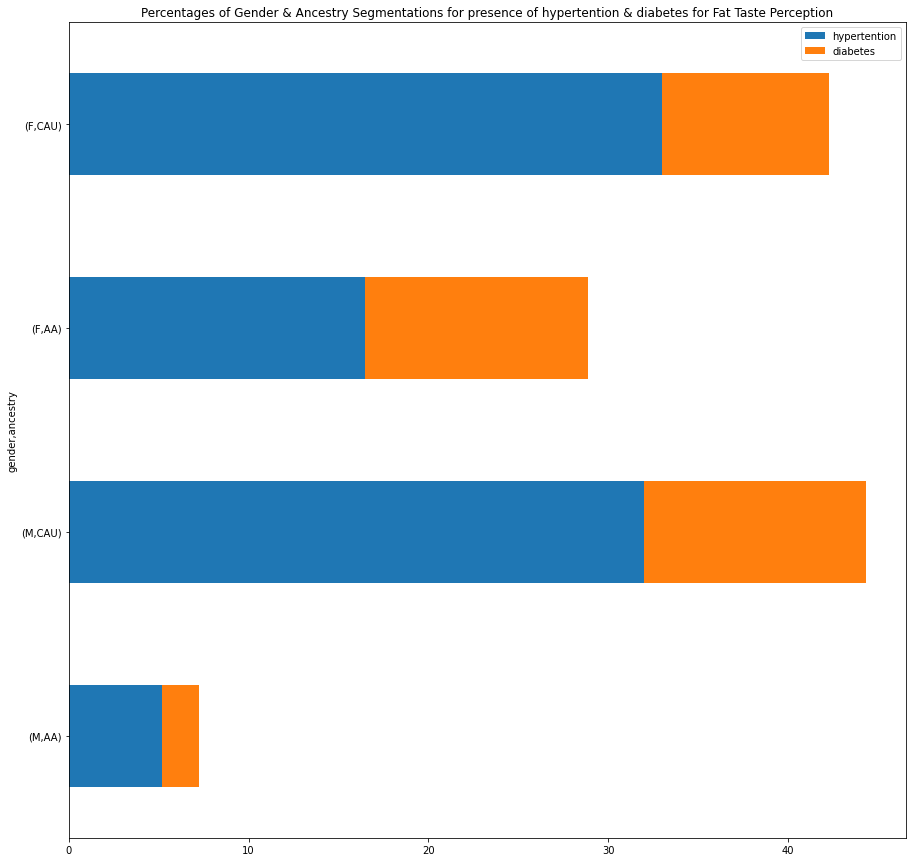

In [25]:
graph_data_percentage2.plot(kind='barh',stacked=True,rot=1, title=graph_title_presence, figsize=(15,15))
plt.yticks(ticks = [0,1,2,3],labels = ['(M,AA)','(M,CAU)','(F,AA)','(F,CAU)'], rotation = 'horizontal')
plt.show()

### Automatic Graph Generation for all traits

In [87]:
groupedData = newdf
# traitNames list of all traits
#unique assesments present in the chosen group
#groupedData.first()
#data=newdf.get_group(traitName)

for trait in traitNames:
   # print(trait)
    trait_data=newdf.get_group(trait)
    list_of_assessments = trait_data['assesment'].unique().tolist()
#     print(list_of_assessments)
#     print('-----')
    traitName = trait
    title_part1 = 'Percentages of Gender & Ancestry Segmentations for 4 BMI categories ' 
    title_part2 = ' of Hypertention & Diabetes for ' + traitName 
    graph_title_lack1 = title_part1 + 'lack' + title_part2 
    graph_title_presence1 = title_part1 + 'presence' + title_part2
    tempDF=trait_data.groupby('assesment')
    for assessment in list_of_assessments:
        graph_data=tempDF.get_group(assessment)
        #make graph titles
        graph_title_lack = graph_title_lack1 + ' for ' + assessment
        graph_title_presence = graph_title_presence1 + ' for ' + assessment
        
        data_for_lack=graph_data.groupby(['gender','ancestry', 'bmi'])['hypertention', 'diabetes'].apply(lambda x: (x==0).sum().apply(lambda x: ((x/97)*100)))
        data_for_presence=graph_data.groupby(['gender','ancestry', 'bmi'])['hypertention', 'diabetes'].apply(lambda x: (x==0).sum().apply(lambda x: ((x/97)*100)))
    
        data_for_lack.plot(kind='barh',stacked=True,rot=1, title=graph_title_lack, figsize=(15,15))
        plt.yticks(ticks = [0,1,2,3,4,5,6,7,8,9,10,11,12],labels = ['(M,AA,Healthy)', '(M,AA,Overweight)','(M,AA,Obesity)','(M,CAU,Healthy)','(M,CAU,Overweight)','(M,CAU,Obesity)','(F,AA,Healthy)','(F,AA,Overweight)','(F,AA,Obesity)','(F,CAU,Under)','(F,CAU,Healthy)','(F,CAU,Overweight)','(F,CAU,Obesity)'], rotation = 'horizontal')
        plt.tick_params(axis='x', colors='black')
        plt.tick_params(axis='y', colors='black')
        graph_name = graph_title_lack + '.png'
        plt.savefig(graph_name, bbox_inches="tight", facecolor="white")
        plt.clf()
        
        data_for_presence.plot(kind='barh',stacked=True,rot=1, title=graph_title_presence, figsize=(15,15))
        plt.yticks(ticks = [0,1,2,3,4,5,6,7,8,9,10,11,12],labels = ['(M,AA,Healthy)', '(M,AA,Overweight)','(M,AA,Obesity)','(M,CAU,Healthy)','(M,CAU,Overweight)','(M,CAU,Obesity)','(F,AA,Healthy)','(F,AA,Overweight)','(F,AA,Obesity)','(F,CAU,Under)','(F,CAU,Healthy)','(F,CAU,Overweight)','(F,CAU,Obesity)'], rotation = 'horizontal')
        plt.tick_params(axis='x', colors='black')
        plt.tick_params(axis='y', colors='black')
        graph_name = graph_title_presence + '.png'
        plt.savefig(graph_name, bbox_inches="tight", facecolor="white")
        plt.clf()


<ipython-input-87-71f6057c3014>:25: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_for_lack=graph_data.groupby(['gender','ancestry', 'bmi'])['hypertention', 'diabetes'].apply(lambda x: (x==0).sum().apply(lambda x: ((x/97)*100)))
<ipython-input-87-71f6057c3014>:26: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_for_presence=graph_data.groupby(['gender','ancestry', 'bmi'])['hypertention', 'diabetes'].apply(lambda x: (x==0).sum().apply(lambda x: ((x/97)*100)))
<ipython-input-87-71f6057c3014>:25: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_for_lack=graph_data.groupby(['gender','ancestry', 'bmi'])['hypertention', 'diabetes'].apply(lambda x: (x==0).sum().apply(lambda x: ((x/97)*100)))
<ipython-input-87-71f6057c3014>:26: FutureWarning: Ind

<ipython-input-87-71f6057c3014>:25: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_for_lack=graph_data.groupby(['gender','ancestry', 'bmi'])['hypertention', 'diabetes'].apply(lambda x: (x==0).sum().apply(lambda x: ((x/97)*100)))
<ipython-input-87-71f6057c3014>:26: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_for_presence=graph_data.groupby(['gender','ancestry', 'bmi'])['hypertention', 'diabetes'].apply(lambda x: (x==0).sum().apply(lambda x: ((x/97)*100)))
<ipython-input-87-71f6057c3014>:25: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_for_lack=graph_data.groupby(['gender','ancestry', 'bmi'])['hypertention', 'diabetes'].apply(lambda x: (x==0).sum().apply(lambda x: ((x/97)*100)))
<ipython-input-87-71f6057c3014>:26: FutureWarning: Ind

<ipython-input-87-71f6057c3014>:25: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_for_lack=graph_data.groupby(['gender','ancestry', 'bmi'])['hypertention', 'diabetes'].apply(lambda x: (x==0).sum().apply(lambda x: ((x/97)*100)))
<ipython-input-87-71f6057c3014>:26: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_for_presence=graph_data.groupby(['gender','ancestry', 'bmi'])['hypertention', 'diabetes'].apply(lambda x: (x==0).sum().apply(lambda x: ((x/97)*100)))
<ipython-input-87-71f6057c3014>:25: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_for_lack=graph_data.groupby(['gender','ancestry', 'bmi'])['hypertention', 'diabetes'].apply(lambda x: (x==0).sum().apply(lambda x: ((x/97)*100)))
<ipython-input-87-71f6057c3014>:26: FutureWarning: Ind

<ipython-input-87-71f6057c3014>:25: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_for_lack=graph_data.groupby(['gender','ancestry', 'bmi'])['hypertention', 'diabetes'].apply(lambda x: (x==0).sum().apply(lambda x: ((x/97)*100)))
<ipython-input-87-71f6057c3014>:26: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_for_presence=graph_data.groupby(['gender','ancestry', 'bmi'])['hypertention', 'diabetes'].apply(lambda x: (x==0).sum().apply(lambda x: ((x/97)*100)))
<ipython-input-87-71f6057c3014>:25: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_for_lack=graph_data.groupby(['gender','ancestry', 'bmi'])['hypertention', 'diabetes'].apply(lambda x: (x==0).sum().apply(lambda x: ((x/97)*100)))
<ipython-input-87-71f6057c3014>:26: FutureWarning: Ind

<ipython-input-87-71f6057c3014>:25: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_for_lack=graph_data.groupby(['gender','ancestry', 'bmi'])['hypertention', 'diabetes'].apply(lambda x: (x==0).sum().apply(lambda x: ((x/97)*100)))
<ipython-input-87-71f6057c3014>:26: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_for_presence=graph_data.groupby(['gender','ancestry', 'bmi'])['hypertention', 'diabetes'].apply(lambda x: (x==0).sum().apply(lambda x: ((x/97)*100)))
<ipython-input-87-71f6057c3014>:25: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_for_lack=graph_data.groupby(['gender','ancestry', 'bmi'])['hypertention', 'diabetes'].apply(lambda x: (x==0).sum().apply(lambda x: ((x/97)*100)))
<ipython-input-87-71f6057c3014>:26: FutureWarning: Ind

<ipython-input-87-71f6057c3014>:25: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_for_lack=graph_data.groupby(['gender','ancestry', 'bmi'])['hypertention', 'diabetes'].apply(lambda x: (x==0).sum().apply(lambda x: ((x/97)*100)))
<ipython-input-87-71f6057c3014>:26: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_for_presence=graph_data.groupby(['gender','ancestry', 'bmi'])['hypertention', 'diabetes'].apply(lambda x: (x==0).sum().apply(lambda x: ((x/97)*100)))
<ipython-input-87-71f6057c3014>:25: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_for_lack=graph_data.groupby(['gender','ancestry', 'bmi'])['hypertention', 'diabetes'].apply(lambda x: (x==0).sum().apply(lambda x: ((x/97)*100)))
<ipython-input-87-71f6057c3014>:26: FutureWarning: Ind

<ipython-input-87-71f6057c3014>:25: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_for_lack=graph_data.groupby(['gender','ancestry', 'bmi'])['hypertention', 'diabetes'].apply(lambda x: (x==0).sum().apply(lambda x: ((x/97)*100)))
<ipython-input-87-71f6057c3014>:26: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_for_presence=graph_data.groupby(['gender','ancestry', 'bmi'])['hypertention', 'diabetes'].apply(lambda x: (x==0).sum().apply(lambda x: ((x/97)*100)))
<ipython-input-87-71f6057c3014>:25: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_for_lack=graph_data.groupby(['gender','ancestry', 'bmi'])['hypertention', 'diabetes'].apply(lambda x: (x==0).sum().apply(lambda x: ((x/97)*100)))
<ipython-input-87-71f6057c3014>:26: FutureWarning: Ind

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>